<a href="https://colab.research.google.com/github/BriefCud/PRA3024-Big-Data-in-Physics/blob/master/week%205/ML_MNIST_NN_exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [0]:
# load training and test images (x), and their respective classified labels (y).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 10 training labels as digits:
 [5 0 4 1 9 2 1 3 1 4]



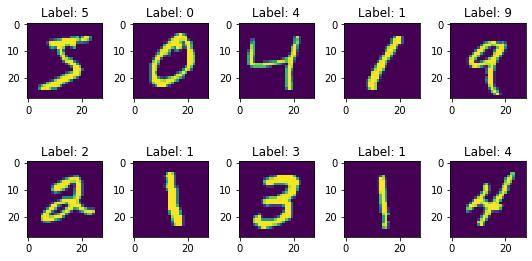

In [3]:
# Investigate the data

print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("First 10 training labels as digits:\n", y_train[:10])
print("")

# Plot the first 10 images
### STUDENT CODE HERE ###
### --> Find a way to plot a sample of 10 images of hand-written digits in the training data
x_axis = []
x_axis = x_train[:10]

#declaring the number of rows and columns
rows = 2
columns = 5

#using plt.subplots() to plot multiple figures in one
#creating handles and specifying the figure dimensions
fig, axes = plt.subplots(rows, columns, figsize=(1.5*columns,2*rows))

for i in range(10):

  #selects where the image will be 
  ax = axes[i//columns, i%columns]

  #display the digit image
  ax.imshow(x_axis[i])

  #adding a label to the image
  ax.set_title('Label: {}'.format(y_train[i]))

#clean up the image
plt.tight_layout()

#display the images
plt.show()

#got my code from here
#https://medium.com/@mrdatascience/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068
### END STUDENT CODE ###

In [4]:
# Pre-processing of data

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
print("reshaped training data format: ", x_train.shape) # -- 60000 images, now flat arrays of 28*28 long

# one-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 10 training lables as one-hot encoded vectors:\n", y_train[:10])

reshaped training data format:  (60000, 784)
First 10 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
# Build the network
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

model = Sequential()

# The input layer requires the special input_shape parameter, which should equal the shape of our training data.
# The output layer must be the same size as the (one-hot encoded) labels.
# Choose a non-linear activation function such as a sigmoid, or relu.
# For classification purposes, where the outputs are normalized 'probabilities' between the classes,
# one typically uses the softmax activation function for the last layer.

### STUDENT CODE HERE ###
### --> add Dense (fully connected) layers to the model to connect input to output.
###  Make sure that the dimensionality is correct: input should be # pixels large, 
###  output should be #classes large. Google is your friend.

# now the model will take as input arrays of shape (*, 420)
# and output arrays of shape (*, 28*28)
model.add(Dense(420,activation="sigmoid",input_dim=image_vector_size))
model.add(Dense(10,activation="softmax"))

### END STUDENT CODE ###

# Print model summary. Shows network layout, and # free parameters (weights + biases) to adapt while learning.
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 420)               329700    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4210      
Total params: 333,910
Trainable params: 333,910
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the model

# A good loss function for probability classification that works well with softmax is the 'categorical crossentropy'.
#  It's a function of the difference between the predicted y (from running the image through the network),
#  and the actual label y that we get from the dataset. The larger the loss, the worst our network is performing.
# A good optimizer is the stochastic gradient descent (sgd) or adam.

### STUDENT CODE HERE ###
### --> Call model.compile with the right arguments.

model.compile("sgd",loss="categorical_crossentropy",metrics=['accuracy'])

### END STUDENT CODE ###







Test loss: 2.64
Test accuracy: 0.133


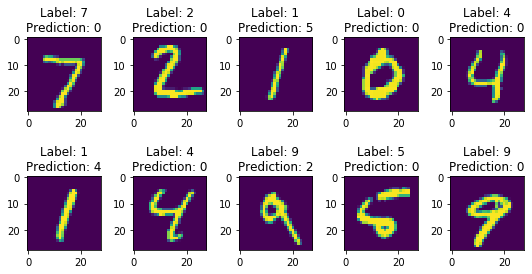

In [7]:
# Let's see how good the model 'predicts' some hand-written digits in our test dataset, without training.
# It's probably random: so for 10 digits, it should get an accuracy around 0.1 .

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

### STUDENT CODE HERE ###
### --> call model.predict_proba() on the test images, and show the predictions of the
###  untrained model for the first 10 images. Also, plot those images, as you did above.

test_pred = model.predict_proba(x_test)

fig, axes = plt.subplots(rows, columns, figsize=(1.5*columns,2*rows))

for i in range(10):
  ax = axes[i//columns, i%columns]
  #reshape the data to
  ax.imshow(x_test[i].reshape(28,28))
  ax.set_title('Label: {}\nPrediction: {}'.format(np.argmax(y_test[i]),np.argmax(test_pred[i])))

plt.tight_layout()
plt.show()

### END STUDENT CODE ###


In [8]:
# Train the model.

# BATCH_SIZE defines how many images to process at once.
# EPOCHS defines how often to run over the total data (60000 images)
# (Note that a small part of the train data is internally split off for independent validation of the metrics)

### STUDENT CODE HERE ###
### --> Edit the parameters below to obtain a better accuracy in the training.

BATCH_SIZE = 850
EPOCHS = 55

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2, validation_split=0.05)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 58800 samples, validate on 1200 samples
Epoch 1/50
 - 0s - loss: 1.4742 - acc: 0.5862 - val_loss: 0.8674 - val_acc: 0.8358
Epoch 2/50
 - 0s - loss: 0.8237 - acc: 0.8080 - val_loss: 0.5847 - val_acc: 0.8933
Epoch 3/50
 - 0s - loss: 0.6425 - acc: 0.8475 - val_loss: 0.4675 - val_acc: 0.9125
Epoch 4/50
 - 0s - loss: 0.5499 - acc: 0.8677 - val_loss: 0.4057 - val_acc: 0.9158
Epoch 5/50
 - 0s - loss: 0.4914 - acc: 0.8799 - val_loss: 0.3625 - val_acc: 0.9167
Epoch 6/50
 - 0s - loss: 0.4500 - acc: 0.8884 - val_loss: 0.3356 - val_acc: 0.9292
Epoch 7/50
 - 0s - loss: 0.4189 - acc: 0.8952 - val_loss: 0.3157 - val_acc: 0.9283
Epoch 8/50
 - 0s - loss: 0.3945 - acc: 0.9004 - val_loss: 0.3018 - val_acc: 0.9308
Epoch 9/50
 - 0s - loss: 0.3744 - acc: 0.9054 - val_loss: 0.2881 - val_acc: 0.9350
Epoch 10/50
 - 0s - loss: 0.3573 - acc: 0.9089 - val_loss: 0.2796 - val_acc: 0.9325
Epoch 11/50
 - 0s - loss

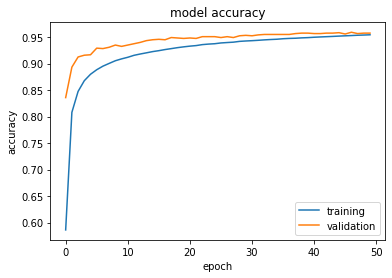

In [9]:
# Plot the progression of the training process

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

Test loss: 0.239
Test accuracy: 0.93


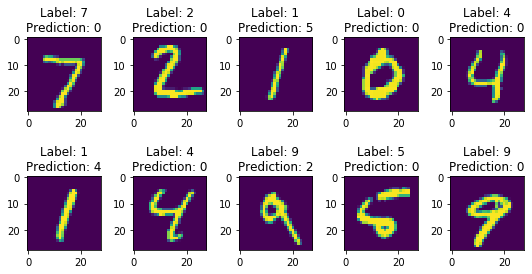

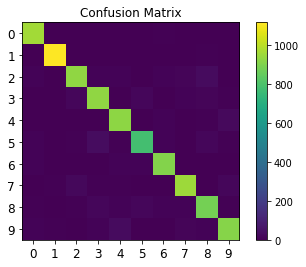

In [22]:
# Evaluate model on test data - how often does the network predict the right label after training?

loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Make a confusion matrix to see which numbers are difficult to disentangle

from sklearn.metrics import confusion_matrix

### STUDENT CODE HERE ###
### --> Now predict again the labels for the test images, but after proper training.
###  Build a confusion matrix to show which labels we often confuse with what.
###  (Note that the y_test and y_pred are still one-hot encoded, so you need to get
###   the index of the maximum entry to find the corresponding predicted 'number'.

fig, axes = plt.subplots(rows, columns, figsize=(1.5*columns,2*rows))

for i in range(10):
  ax = axes[i//columns, i%columns]
  #reshape the data to
  ax.imshow(x_test[i].reshape(28,28))
  ax.set_title('Label: {}\nPrediction: {}'.format(np.argmax(y_test[i]),np.argmax(test_pred[i])))

plt.tight_layout()
plt.show()


y_pred_test = model.predict_proba(x_test) # obtain one-hot encoded predictions for the x_test images
y_pred_test_index = [np.argmax(i) for i in y_pred_test]
y_test_index = [np.argmax(i) for i in y_test]
y_pred_test_prob = [y_pred_test[i][y_pred_test_index[i]] for i in range(len(y_test_index))]

plt.title("Confusion Matrix")
plt.imshow(confusion_matrix(y_test_index, y_pred_test_index ))
plt.xticks(np.arange(10), np.arange(10), rotation=0, fontsize=12)
plt.yticks(np.arange(10), np.arange(10), fontsize=12)
plt.colorbar()
plt.show()

### END STUDENT CODE ###

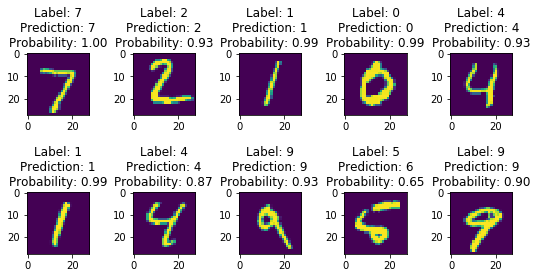

In [37]:
# Show some predicted labels and their probabilities to be correct

### STUDENT CODE HERE ###
### --> Now show some hand-written digit images from the test sample, 
###  their corresponding true label, their predicted label from your network,
###  and the probability associated with that prediction.

fig, axes = plt.subplots(rows, columns, figsize=(1.5*columns,2*rows))

for i in range(10):
  ax = axes[i//columns, i%columns]
  #reshape the data to
  ax.imshow(x_test[i].reshape(28,28))
  ax.set_title('Label: {}\nPrediction: {}\nProbability: {:.2f}'.format(y_test_index[i],y_pred_test_index[i],y_pred_test_prob[i]))

plt.tight_layout()
plt.show()

### END STUDENT CODE ###